# TASK - EDA-TERRORISM

## AUTHOR - LIYA T MATHEW

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv(r'C:\Users\ADMIN\Desktop\LI DOCS\SPARK\terrorism\globalterrorismdb_0718dist.csv', encoding='latin-1')


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_224\2580272450.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\ADMIN\Desktop\LI DOCS\SPARK\terrorism\globalterrorismdb_0718dist.csv', encoding='latin-1')


In [3]:
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.shape

(181691, 135)

In [5]:
col_list=df.columns.tolist()
col_list

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [6]:
cols_to_keep = [
    'iyear', 'imonth', 'iday', 'country', 'country_txt', 'region', 'city', 'latitude',
    'longitude', 'attacktype1', 'attacktype1_txt', 'targtype1', 'targsubtype1', 'targtype1_txt', 'targsubtype1_txt',
    'gname', 'nkill', 'nwound', 'weaptype1', 'weaptype1_txt', 'propextent', 'propextent_txt',
    'motive', 'summary', 'natlty1', 'natlty1_txt'
]
df=df[cols_to_keep]

In [7]:
df.shape

(181691, 26)

In [8]:
df.dtypes

iyear                 int64
imonth                int64
iday                  int64
country               int64
country_txt          object
region                int64
city                 object
latitude            float64
longitude           float64
attacktype1           int64
attacktype1_txt      object
targtype1             int64
targsubtype1        float64
targtype1_txt        object
targsubtype1_txt     object
gname                object
nkill               float64
nwound              float64
weaptype1             int64
weaptype1_txt        object
propextent          float64
propextent_txt       object
motive               object
summary              object
natlty1             float64
natlty1_txt          object
dtype: object

In [9]:
df.isna().sum()

iyear                    0
imonth                   0
iday                     0
country                  0
country_txt              0
region                   0
city                   435
latitude              4556
longitude             4557
attacktype1              0
attacktype1_txt          0
targtype1                0
targsubtype1         10373
targtype1_txt            0
targsubtype1_txt     10373
gname                    0
nkill                10313
nwound               16311
weaptype1                0
weaptype1_txt            0
propextent          117626
propextent_txt      117626
motive              131130
summary              66129
natlty1               1559
natlty1_txt           1559
dtype: int64

In [10]:
unq=df.propextent_txt.unique()
print(unq)
unq2=df.natlty1_txt.nunique()
print(unq2)

[nan 'Minor (likely < $1 million)'
 'Major (likely >= $1 million but < $1 billion)' 'Unknown'
 'Catastrophic (likely >= $1 billion)']
215


In [11]:
#Since for some columns,it doesnt make sense to use statistical imputation,so going to drop those rows with null values
cols = ['city', 'nkill', 'nwound', 'propextent', 'propextent_txt', 'motive', 'summary']
df=df.dropna(subset=cols)

In [12]:
#Going with statistical imputation to avoid significant data loss
#from sklearn.impute import SimpleImputer
median_imp=SimpleImputer(missing_values=np.nan,strategy='median')
df['latitude']=median_imp.fit_transform(df[['latitude']])
df['longitude']=median_imp.fit_transform(df[['longitude']])
mode_imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['natlty1']=mode_imp.fit_transform(df[['natlty1']])
#Since natlty1_txt is categorical,using Unknown to fill the null values
df['natlty1_txt'].fillna('Unknown',inplace=True)

In [13]:
#Gong with forward filling as they represent the subtype information for the target subtype
df['targsubtype1'].fillna(method='ffill', inplace=True)
df['targsubtype1_txt'].fillna(method='ffill', inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_224\2207869415.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['targsubtype1'].fillna(method='ffill', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_224\2207869415.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['targsubtype1_txt'].fillna(method='ffill', inplace=True)


In [14]:
df.isna().sum()

iyear               0
imonth              0
iday                0
country             0
country_txt         0
region              0
city                0
latitude            0
longitude           0
attacktype1         0
attacktype1_txt     0
targtype1           0
targsubtype1        0
targtype1_txt       0
targsubtype1_txt    0
gname               0
nkill               0
nwound              0
weaptype1           0
weaptype1_txt       0
propextent          0
propextent_txt      0
motive              0
summary             0
natlty1             0
natlty1_txt         0
dtype: int64

In [15]:
#Checking for duplicate rows
duplicates=df.duplicated()
sum(duplicates)

466

In [19]:
df=df.drop_duplicates()

In [21]:
duplicates=df.duplicated()
sum(duplicates)

0

In [22]:
#Checking for variance
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
var_col = numeric_columns.var()
print(var_col)

iyear              48.900816
imonth             11.478570
iday               77.982909
country         10657.911809
region              6.936386
latitude          201.708257
longitude        2485.661450
attacktype1         3.054992
targtype1          45.667703
targsubtype1     1071.991404
nkill             304.802774
nwound           6965.350865
weaptype1           2.139108
propextent          0.262951
natlty1          8938.739008
dtype: float64


In [23]:
#Removing propextent a sthe variation is too less
df=df.drop(columns='propextent')

In [24]:
df.shape

(23390, 25)

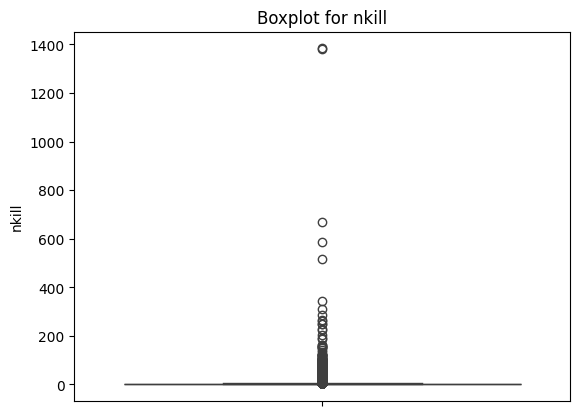

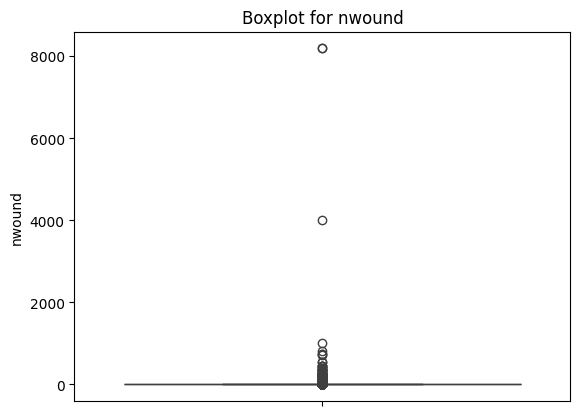

In [25]:
#Outlier Analysis
sns.boxplot(data=df, y='nkill')
plt.title('Boxplot for nkill')
plt.show()

sns.boxplot(data=df, y='nwound')
plt.title('Boxplot for nwound')
plt.show()

#Since these outliers are valid,going to retain them

In [26]:
df.columns

Index(['iyear', 'imonth', 'iday', 'country', 'country_txt', 'region', 'city',
       'latitude', 'longitude', 'attacktype1', 'attacktype1_txt', 'targtype1',
       'targsubtype1', 'targtype1_txt', 'targsubtype1_txt', 'gname', 'nkill',
       'nwound', 'weaptype1', 'weaptype1_txt', 'propextent_txt', 'motive',
       'summary', 'natlty1', 'natlty1_txt'],
      dtype='object')

In [27]:
#Creating a new column casualities
df['casualities']=df['nkill']+df['nwound']

In [28]:
#No of unique values in casualities
df.casualities.nunique()

271

In [29]:
range_cas=max(df.casualities)-min(df.casualities)
print(range_cas)

9574.0


In [30]:
#Discretization
bin=[-9574,0,100,1000,10000]
label=['No Casualities','Low Casualities','Moderate Casualities','High Casualities']
df['Severity']=pd.cut(df['casualities'],bins=bin,labels=label)

In [31]:
#Range of the dates available in this daatset
start_date=df['iyear'].min()
print(f' Start Date-{start_date}')
end_date=df['iyear'].max()
print(f' End Date-{end_date}')

 Start Date-1970
 End Date-2017


In [32]:
df.shape

(23390, 27)

In [33]:
df.to_csv('terrorism_cleaned_data.csv', index=False)

In [40]:
#Auto EDA
import sweetviz as sv
s=sv.analyze(df)
s.show_html('Sweetviz_Terrorism_AutoEDA.html')

                                             |          | [  0%]   00:00 -> (? left)

D:\anac\envs\pharma\Lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
D:\anac\envs\pharma\Lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
D:\anac\envs\pharma\Lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
D:\anac\envs\pharma\Lib\site-packages\sweetviz\from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  

Report Sweetviz_Terrorism_AutoEDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
